# SETUP

In [70]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Autosipper

In [71]:
# config directory must have "__init__.py" file
# from the 'config' directory, import the following classes:
from config import Motor, ASI_Controller, Autosipper
from config import utils as ut

autosipper = Autosipper(Motor('config/motor.yaml'), ASI_Controller('config/asi_controller.yaml'))
autosipper.coord_frames

Initializing stage...


,hardware,deck
transform,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...","[[-1, 0, 0], [0, 1, 0], [0, 0, -1], [0, 0, 93]]"
position_table,None,None


In [132]:
from config import gui
gui.stage_control(autosipper.XY, autosipper.Z)

(93.9997,)


In [ ]:
# add/determine deck info
autosipper.coord_frames.deck.position_table = ut.read_delim_pd('config/position_tables/deck')

# check deck alignment
# CLEAR DECK OF OBSTRUCTIONS!!
autosipper.go_to('deck', ['name'],'align')

In [ ]:
# add plate

### Manifold

In [118]:
from config import Manifold

manifold = Manifold('192.168.1.3', 'config/valvemaps/valvemap.csv', 512)
manifold.valvemap[manifold.valvemap.name>0]

,valve,name
0,0,inlet_out
2,2,inlet_in
8,8,chip_out
14,14,chip_in


In [272]:
for i in [2,0,14,8]:
    status = 'x'
    if manifold.read_valve(i):
        status = 'o'
    print status, manifold.valvemap.name.iloc[i]

o inlet_in
x inlet_out
x chip_in
x chip_out


In [255]:
for i in range(16):
    status = 'x'
    if manifold.read_valve(i):
        status = 'o'
    print i, status, manifold.valvemap.name.iloc[i]

0 x inlet_out
1 x nan
2 o inlet_in
3 x nan
4 x nan
5 x nan
6 x nan
7 x nan
8 o chip_out
9 x nan
10 x nan
11 x nan
12 x nan
13 x nan
14 o chip_in
15 x nan


In [266]:
name = 'inlet_in'
v = manifold.valvemap['valve'][manifold.valvemap.name==name]

In [212]:
v=7

In [269]:
manifold.depressurize(v)

In [270]:
manifold.pressurize(v)

In [117]:
manifold.exit()

In [240]:
for j in range(5):
    for i in range(9,14):
        manifold.depressurize(i)
        time.sleep(1)
        manifold.pressurize(i)
    

### Micromanager

In [67]:
# !!!! Also must have MM folder on system PATH
# mm_version = 'C:\Micro-Manager-1.4'
# cfg = 'C:\Micro-Manager-1.4\SetupNumber2_05102016.cfg'
mm_version = 'C:\Program Files\Micro-Manager-2.0beta'
cfg = 'C:\Program Files\Micro-Manager-2.0beta\Setup2_20170413.cfg'

import sys
sys.path.insert(0, mm_version) # make it so python can find MMCorePy
import MMCorePy

from PIL import Image

core = MMCorePy.CMMCore()
core.loadSystemConfiguration(cfg)
core.setProperty("Spectra", "White_Enable", "1")
core.waitForDevice("Spectra")

core.setProperty("Cam Andor_Zyla4.2", "Sensitivity/DynamicRange", "16-bit (low noise & high well capacity)") # NEED TO SET CAMERA TO 16 BIT (ceiling 12 BIT = 4096)

CMMError: Line 9: Device,Cam Andor_Zyla4.2,AndorSDK3,Andor sCMOS Camera
Failed to load device "Andor sCMOS Camera" from adapter module "AndorSDK3" [ Device adapter "AndorSDK3" failed to instantiate device "Andor sCMOS Camera" ]



In [ ]:
# core.initializeCircularBuffer()
# core.setCircularBufferMemoryFootprint(4096) # MiB 

Preset: 1_PBP   
ConfigGroup,Channel,1_PBP,TIFilterBlock1,Label,1-PBP

Preset: 2_BF    
ConfigGroup,Channel,2_BF,TIFilterBlock1,Label,2-BF

Preset: 3_DAPI   
ConfigGroup,Channel,3_DAPI,TIFilterBlock1,Label,3-DAPI

Preset: 4_eGFP   
ConfigGroup,Channel,4_eGFP,TIFilterBlock1,Label,4-GFP

Preset: 5_Cy5   
ConfigGroup,Channel,5_Cy5,TIFilterBlock1,Label,5-Cy5

Preset: 6_AttoPhos   
ConfigGroup,Channel,6_AttoPhos,TIFilterBlock1,Label,6-AttoPhos

# ACQUISITION

In [5]:
core.setConfig('Channel','2_BF')

In [6]:
core.setProperty(core.getCameraDevice(), "Exposure", 300)

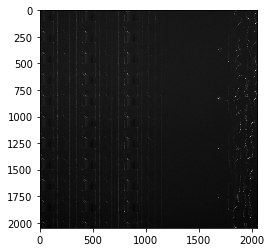

In [7]:
core.snapImage()
img = core.getImage()
plt.imshow(img,cmap='gray')
image = Image.fromarray(img)
# image.save('TESTIMAGE.tif')

In [8]:
position_list = ut.load_mm_positionlist("C:/Users/fordycelab/Desktop/D1_cjm.pos")
position_list

,r,c,name,x,y
0,0,0,1-Pos_000_000,-16212.71272,-19875.62168
1,0,1,1-Pos_001_000,-13894.29480,-19875.62168
2,0,2,1-Pos_002_000,-11575.87688,-19875.62168
3,0,3,1-Pos_003_000,-9257.45896,-19875.62168
4,0,4,1-Pos_004_000,-6939.04104,-19875.62168
5,0,5,1-Pos_005_000,-4620.62312,-19875.62168
6,0,6,1-Pos_006_000,-2302.20520,-19875.62168
7,0,7,1-Pos_007_000,16.21272,-19875.62168
8,1,7,1-Pos_007_001,16.21272,-17557.20376
9,1,6,1-Pos_006_001,-2302.20520,-17557.20376


In [18]:
def acquire():
    for i in xrange(len(position_list)):
        si = str(i)
        x,y = position_list[['x','y']].iloc[i]
        core.setXYPosition(x,y)
        core.waitForDevice(core.getXYStageDevice())
        logadd(log, 'moved '+si)
        
        core.snapImage()
#         core.waitForDevice(core.getCameraDevice())
        logadd(log, 'snapped '+si)
        
        img = core.getImage()
        logadd(log, 'got image '+si)
        
        image = Image.fromarray(img)
        image.save('images/images_{}.tif'.format(i))
        logadd(log, 'saved image '+si)
    
    x,y = position_list[['x','y']].iloc[0]
    core.setXYPosition(x,y)
    core.waitForDevice(core.getXYStageDevice())
    logadd(log, 'moved '+ str(0))
        
def logadd(log,st):
    log.append([time.ctime(time.time()), st])
    print log[-1]

In [ ]:
# Trial 1: crapped out after 10 min wait (stage moved to first position, shutter open, then froze)
# for some reason, did not log this (updated print statement)
log = []
for i in xrange(10):
    acquire()
    sleep = 5*(i+1)*60
    print('SLEEP', sleep)
    time.sleep(5*(i+1)*60)

In [ ]:
# Trial 2: Went to completion; max wait 9 min
log = []
for i in xrange(10):
    logadd(log, 'ACQ STARTED')
    acquire()
    sleep = (5 + 0.5*i)*60
    print 'SLEEP', sleep/60, 'min'
    time.sleep(sleep)

In [ ]:
# Trial 3: No errors
log = []
for i in xrange(10):
    sleep = (9 + 0.25*i)*60
    logadd(log, 'STRT SLEEP '+ str(sleep/60) + ' min')
    time.sleep(sleep)
    
    logadd(log, 'ACQ STARTED')
    acquire()

In [ ]:
# Trial 4: No problems through 45 min wait; terminated kernel
log = []
for i in xrange(10):
    sleep = (10 + 5*i)*60
    logadd(log, 'STRT SLEEP '+ str(sleep/60) + ' min')
    time.sleep(sleep)
    
    logadd(log, 'ACQ STARTED '+str(i))
    acquire()

In [ ]:
# Trial 5: returning stage to home at end of acquire
log = []
for i in xrange(15):
    sleep = (10 + 10*i)*60
    logadd(log, 'STRT SLEEP '+ str(sleep/60) + ' min')
    time.sleep(sleep)
    
    logadd(log, 'ACQ STARTED '+str(i))
    acquire()

['Wed May 10 23:42:21 2017', 'STRT SLEEP 10 min']
['Wed May 10 23:52:21 2017', 'ACQ STARTED 0']
['Wed May 10 23:52:23 2017', 'moved 0']
['Wed May 10 23:52:23 2017', 'snapped 0']
['Wed May 10 23:52:23 2017', 'got image 0']
['Wed May 10 23:52:23 2017', 'saved image 0']
['Wed May 10 23:52:24 2017', 'moved 1']
['Wed May 10 23:52:24 2017', 'snapped 1']
['Wed May 10 23:52:24 2017', 'got image 1']
['Wed May 10 23:52:24 2017', 'saved image 1']
['Wed May 10 23:52:25 2017', 'moved 2']
['Wed May 10 23:52:25 2017', 'snapped 2']
['Wed May 10 23:52:25 2017', 'got image 2']
['Wed May 10 23:52:25 2017', 'saved image 2']
['Wed May 10 23:52:26 2017', 'moved 3']
['Wed May 10 23:52:26 2017', 'snapped 3']
['Wed May 10 23:52:26 2017', 'got image 3']
['Wed May 10 23:52:26 2017', 'saved image 3']
['Wed May 10 23:52:27 2017', 'moved 4']
['Wed May 10 23:52:27 2017', 'snapped 4']
['Wed May 10 23:52:27 2017', 'got image 4']
['Wed May 10 23:52:27 2017', 'saved image 4']
['Wed May 10 23:52:28 2017', 'moved 5']
['We

In [ ]:
# Auto
core.setAutoShutter(True) # default
core.snapImage()

# Manual
core.setAutoShutter(False) # disable auto shutter
core.setProperty("Shutter", "State", "1")
core.waitForDevice("Shutter")
core.snapImage()
core.setProperty("Shutter", "State", "0")

### MM Get info

In [ ]:
core.getFocusDevice()
core.getCameraDevice()
core.XYStageDevice()
core.getDevicePropertyNames(core.getCameraDevice())

### Video

In [ ]:
# cv2.startWindowThread()
cv2.namedWindow('Video')
cv2.imshow('Video',img)
cv2.waitKey(0)

In [ ]:
cv2.destroyAllWindows()
core.stopSequenceAcquisition()

In [ ]:
import cv2
cv2.namedWindow('Video')
core.startContinuousSequenceAcquisition(1)
while True:
    img = core.getLastImage()
    if core.getRemainingImageCount() > 0:
#         img = core.popNextImage()
        img = core.getLastImage()
        cv2.imshow('Video', img)
        cv2.waitkey(0)
    else:
        print('No frame')
    if cv2.waitKey(20) >= 0:
        break
cv2.destroyAllWindows()
core.stopSequenceAcquisition()
# core.reset()

# EXIT

In [ ]:
autosipper.exit()
manifold.exit()
core.unloadAllDevices()
core.reset()
print 'closed'